## Imagenette2-160

In [0]:
import torch
from fastai.vision import *
from fastai.basics import *
from fastai.callbacks import *

from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

defaults.device = torch.device('cuda') # makes sure the gpu is used

In [0]:
model = models.resnet18
epochs_no = 15
lr = 1e-2

In [0]:
def get_callbacks(model_name):
  return [
          SaveModelCallback(model_name, every='improvement', monitor='valid_loss', name='best'),
          EarlyStoppingCallback(model_name, monitor='accuracy', min_delta=0.01, patience=5)
          ]

In [0]:
import os
if not os.path.isdir('./imagenette2-160.zip'):
  import gdown
  url = 'https://drive.google.com/uc?id=11MOFZF2dVjEu0PbSPmGVWbb2olSZ8eHV'
  output = 'imagenette2-160.zip'
  gdown.download(url, output, quiet=False)
  !unzip "imagenette2-160.zip" -d .
  %rm imagenette2-160.zip

In [0]:
path =  './imagenette2-160'
im_loader = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, size = 160).normalize(imagenet_stats)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-04
Min loss divided by 10: 3.31E-03


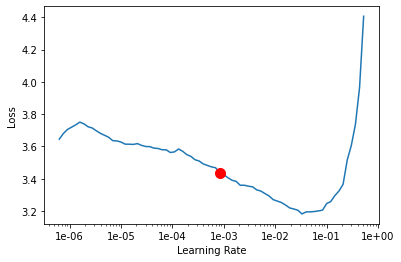

In [6]:
learn = cnn_learner(im_loader, model, metrics=[accuracy], pretrained=False)
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [7]:
learn.fit_one_cycle(epochs_no, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.980176,1.636856,0.503361,00:21
1,1.629852,1.874789,0.414488,00:21
2,1.618459,2.196121,0.363331,00:21
3,1.415913,1.421179,0.548170,00:21
4,1.261269,1.530854,0.504108,00:21
5,1.099057,1.249840,0.594847,00:21
6,0.917207,0.885003,0.716580,00:21
7,0.791300,0.818632,0.749440,00:21
8,0.660185,0.911764,0.723301,00:21
9,0.497794,0.731373,0.780060,00:21


## Stylized-imagenette2-160


In [0]:
if not os.path.isdir('./stylized-imagenette2-160'):
  import gdown
  url = 'https://drive.google.com/uc?id=1af258muaAXdas72oTcS1Wjeu3592Smil'
  output = 'stylized-imagenette2-160.zip'
  gdown.download(url, output, quiet=False)
  !unzip "stylized-imagenette2-160.zip" -d .
  %rm stylized-imagenette2-160.zip

In [0]:
np.random.seed(42)
path = './stylized-imagenette2-160'
sin_loader = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, size=160).normalize(imagenet_stats)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 4.79E-03


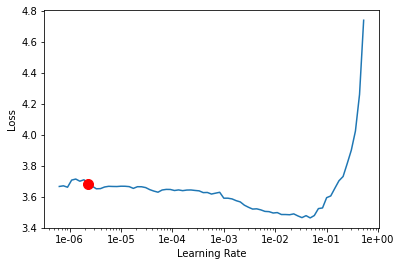

In [10]:
stylized_learn = cnn_learner(sin_loader, model, metrics=accuracy, pretrained=False)
stylized_learn.lr_find()
stylized_learn.recorder.plot(suggestion=True)

In [11]:
stylized_learn.fit_one_cycle(epochs_no, lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.691164,2.826997,0.221060,00:21
1,2.274496,8.922625,0.141150,00:21
2,2.131934,2.032078,0.314040,00:21
3,2.011948,5.493402,0.173264,00:21
4,1.737767,1.930714,0.380508,00:20
5,1.606703,1.824918,0.402166,00:20
6,1.436786,1.601625,0.465273,00:21
7,1.265938,1.782229,0.465646,00:20
8,1.023169,1.326135,0.582524,00:21
9,0.698066,1.383311,0.579910,00:20


## Test visualisation on imagenette2-160

In [12]:
import os
if not os.path.isdir('./dogparachute.zip'):
  import gdown
  url = 'https://drive.google.com/uc?id=1ukX-w4PO1qzlL81t0VT0XXpUEbijlRO-'
  output = 'dogparachute.zip'
  gdown.download(url, output, quiet=False)
  !unzip "dogparachute.zip" -d .
  %rm dogparachute.zip

test_loader = ImageDataBunch.from_folder('dogparachute', train='train', test='test', size = 160).normalize(imagenet_stats)
learn.data.test_dl = test_loader.test_dl
learn.data.test_ds

Downloading...
From: https://drive.google.com/uc?id=1ukX-w4PO1qzlL81t0VT0XXpUEbijlRO-
To: /content/dogparachute.zip
100%|██████████| 238k/238k [00:00<00:00, 49.8MB/s]


Archive:  dogparachute.zip
   creating: ./dogparachute/
   creating: ./dogparachute/test/
  inflating: ./dogparachute/test/dog-stylized-parachute.JPEG  
  inflating: ./dogparachute/test/dog.JPEG  
  inflating: ./dogparachute/test/para-ref.JPEG  
  inflating: ./dogparachute/test/parachute.JPEG  
   creating: ./dogparachute/train/
  inflating: ./dogparachute/train/dog-stylized-parachute.JPEG  
  inflating: ./dogparachute/train/dog.JPEG  
  inflating: ./dogparachute/train/para-ref.JPEG  
  inflating: ./dogparachute/train/parachute.JPEG  
You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:248: UserWarning: Your training dataloader is empty, you have only 4 items in your training set.
                 Your batch size is 64, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


LabelList (4 items)
x: ImageList
Image (3, 160, 160),Image (3, 160, 160),Image (3, 160, 160),Image (3, 160, 160)
y: EmptyLabelList
,,,
Path: dogparachute

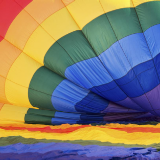

In [13]:
learn.data.test_ds[0][0]

In [14]:
learn.predict(learn.data.test_ds[0][0])

(Category parachute,
 tensor(8),
 tensor([3.7340e-01, 4.2638e-03, 4.0712e-02, 5.6599e-05, 3.8170e-05, 4.3204e-04,
         7.6272e-05, 9.1334e-02, 4.8179e-01, 7.8969e-03]))

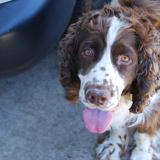

In [15]:
learn.data.test_ds[1][0]

In [16]:
learn.predict(learn.data.test_ds[1][0])

(Category english_springer,
 tensor(3),
 tensor([1.4084e-08, 7.2072e-08, 1.3446e-08, 1.0000e+00, 2.9119e-09, 4.7771e-09,
         1.0645e-08, 2.6283e-06, 3.1019e-07, 1.8258e-08]))

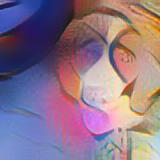

In [17]:
learn.data.test_ds[2][0]

In [18]:
learn.predict(learn.data.test_ds[2][0])

(Category parachute,
 tensor(8),
 tensor([7.4037e-05, 9.7008e-04, 4.5941e-06, 2.0191e-04, 7.3751e-06, 2.7893e-07,
         2.3982e-05, 5.2330e-04, 9.9810e-01, 9.3069e-05]))

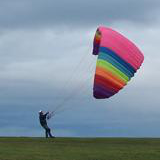

In [19]:
learn.data.test_ds[3][0]

In [20]:
learn.predict(learn.data.test_ds[3][0])

(Category parachute,
 tensor(8),
 tensor([4.7101e-08, 1.3591e-06, 2.2654e-05, 3.9912e-07, 3.4108e-07, 7.1328e-08,
         1.0467e-07, 2.4314e-04, 9.9973e-01, 2.4999e-06]))

## Test visualization on stylized-imagenette2-160

In [21]:
stylized_learn.data.test_dl = test_loader.test_dl
stylized_learn.data.test_ds

LabelList (4 items)
x: ImageList
Image (3, 160, 160),Image (3, 160, 160),Image (3, 160, 160),Image (3, 160, 160)
y: EmptyLabelList
,,,
Path: dogparachute

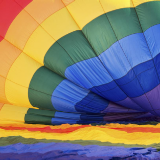

In [22]:
stylized_learn.data.test_ds[0][0]

In [23]:
stylized_learn.predict(learn.data.test_ds[0][0])

(Category garbage_truck,
 tensor(5),
 tensor([1.4047e-04, 6.4907e-02, 3.7236e-01, 2.8553e-05, 9.5338e-02, 4.4544e-01,
         2.4874e-04, 7.8875e-04, 1.7342e-02, 3.4032e-03]))

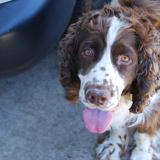

In [24]:
stylized_learn.data.test_ds[1][0]

In [25]:
stylized_learn.predict(learn.data.test_ds[1][0])

(Category english_springer,
 tensor(3),
 tensor([1.1907e-10, 1.1707e-12, 1.2517e-12, 1.0000e+00, 2.3008e-12, 7.9383e-15,
         1.0284e-10, 1.7214e-12, 7.5363e-12, 4.0989e-14]))

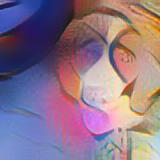

In [26]:
stylized_learn.data.test_ds[2][0]

In [27]:
stylized_learn.predict(learn.data.test_ds[2][0])

(Category english_springer,
 tensor(3),
 tensor([8.8755e-03, 5.7920e-03, 4.6542e-05, 9.1313e-01, 6.3110e-02, 3.1557e-04,
         7.4815e-04, 3.9536e-03, 8.6468e-04, 3.1609e-03]))

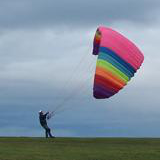

In [28]:
stylized_learn.data.test_ds[3][0]

In [29]:
stylized_learn.predict(learn.data.test_ds[3][0])

(Category parachute,
 tensor(8),
 tensor([1.3522e-02, 9.0036e-04, 1.3655e-05, 7.0818e-05, 1.7656e-03, 7.0404e-07,
         8.7859e-06, 1.9163e-01, 7.9208e-01, 9.2683e-06]))